<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据分析" data-toc-modified-id="数据分析-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据分析</a></span><ul class="toc-item"><li><span><a href="#数据说明及清洗" data-toc-modified-id="数据说明及清洗-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>数据说明及清洗</a></span><ul class="toc-item"><li><span><a href="#提交数据集" data-toc-modified-id="提交数据集-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>提交数据集</a></span></li><li><span><a href="#训练数据集" data-toc-modified-id="训练数据集-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>训练数据集</a></span><ul class="toc-item"><li><span><a href="#异常值处理" data-toc-modified-id="异常值处理-1.1.2.1"><span class="toc-item-num">1.1.2.1&nbsp;&nbsp;</span>异常值处理</a></span></li></ul></li><li><span><a href="#测试数据集" data-toc-modified-id="测试数据集-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>测试数据集</a></span><ul class="toc-item"><li><span><a href="#异常值处理" data-toc-modified-id="异常值处理-1.1.3.1"><span class="toc-item-num">1.1.3.1&nbsp;&nbsp;</span>异常值处理</a></span></li></ul></li><li><span><a href="#商店数据集" data-toc-modified-id="商店数据集-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>商店数据集</a></span><ul class="toc-item"><li><span><a href="#异常值处理" data-toc-modified-id="异常值处理-1.1.4.1"><span class="toc-item-num">1.1.4.1&nbsp;&nbsp;</span>异常值处理</a></span></li><li><span><a href="#数据转换" data-toc-modified-id="数据转换-1.1.4.2"><span class="toc-item-num">1.1.4.2&nbsp;&nbsp;</span>数据转换</a></span></li><li><span><a href="#缺失值处理" data-toc-modified-id="缺失值处理-1.1.4.3"><span class="toc-item-num">1.1.4.3&nbsp;&nbsp;</span>缺失值处理</a></span></li></ul></li></ul></li><li><span><a href="#数据探索" data-toc-modified-id="数据探索-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>数据探索</a></span><ul class="toc-item"><li><span><a href="#数据联合" data-toc-modified-id="数据联合-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>数据联合</a></span></li><li><span><a href="#数据可视化" data-toc-modified-id="数据可视化-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>数据可视化</a></span></li><li><span><a href="#方差分析" data-toc-modified-id="方差分析-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>方差分析</a></span></li><li><span><a href="#箱线图" data-toc-modified-id="箱线图-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>箱线图</a></span></li><li><span><a href="#相关性分析" data-toc-modified-id="相关性分析-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>相关性分析</a></span></li><li><span><a href="#可视化不同时段的销量" data-toc-modified-id="可视化不同时段的销量-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>可视化不同时段的销量</a></span></li></ul></li></ul></li></ul></div>

# 数据分析

## 数据说明及清洗

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'

In [97]:
sample_submission = pd.read_csv('rossmann-store-sales/sample_submission.csv')
store = pd.read_csv('rossmann-store-sales/store.csv')
train = pd.read_csv('rossmann-store-sales/train.csv')
test = pd.read_csv('rossmann-store-sales/test.csv')

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 提交数据集

**提交数据集**：包含两列，第一列为训练数据的 ID 编号，第二列 Sales 为该商店对应的销量 Sales。

In [98]:
sample_submission.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


### 训练数据集

**训练数据集**：包括销售在内的历史数据，包含以下变量：

| 变量名 | 变量含义 |变量类型 | 取值范围 | 备注 |
| ------ | ------ | ------ | ------ | ------ | 
| **Store** | 商店编号 | 离散型 | [1,1115] |  | 
| **DayOfWeek** | 星期 | 离散型 | [1,7] |  | 
| **Date** | 销售日期 | 离散型 | [2013-01-01,2015-07-31] |  | 
| **Sales** | 销售量 | 连续型 | [0,41551] |  | 
| **Customers** | 顾客数 | 连续型 | [0,7388] |  | 
| **Open** | 是否营业 | 离散型 | [0,1] |  | 
| **Promo** | 当日是否有促销活动 | 离散型 | [0,1] |  | 
| **StateHoliday** | 国定假日 | 离散型 | [0,a,b,c] | a=公共假日，b=复活节假日，c=圣诞节，0=无 | 
| **SchoolHoliday** | 学校假日 | 离散型 | [0,1] | 是否受到公立学校关闭的影响 | 

> *通常除了少数例外，所有商店都在国定假日关门。请注意，所有学校都在公共假日和周末关闭。*

In [99]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


#### 异常值处理

可以看到，原数据中 StateHoliday 类数据有 ['0', 'a', 'b', 'c', 0] ，0 和 '0' 属于同一类，因此将 0 类数据转换为 '0'。

In [100]:
pd.unique(train['StateHoliday'])

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [101]:
index = train[train['StateHoliday'] == 0].index
train.loc[index,['StateHoliday']] = '0'

In [102]:
pd.unique(train['StateHoliday'])

array(['0', 'a', 'b', 'c'], dtype=object)

In [103]:
train.to_csv('/Users/apple/Documents/Jupyter/Udacity/Rossmann_Store_Sales/data/train.csv')

### 测试数据集

**训练数据集**：历史数据（不包括销售额），包含以下变量：

| 变量名 | 变量含义 |变量类型 | 取值范围 | 备注 |
| ------ | ------ | ------ | ------ | ------ | 
| **Id** | 记录编号 | 离散型 | [1,41088] |  | 
| **Store** | 商店编号 | 离散型 | [1,1115] |  | 
| **DayOfWeek** | 星期 | 离散型 | [1,7] |  | 
| **Date** | 销售日期 | 离散型 | [2015-08-01,2015-09-17] |  | 
| **Open** | 是否营业 | 离散型 | [0,1] | nan为未知 | 
| **Promo** | 当日是否有促销活动 | 离散型 | [0,1] |  | 
| **StateHoliday** | 国定假日 | 离散型 | [0,a,b,c] | a=公共假日，b=复活节假日，c=圣诞节，0=无 | 
| **SchoolHoliday** | 学校假日 | 离散型 | [0,1] | 是否受到公立学校关闭的影响 | 

*通常所有商店，除了少数例外，都在国定假日关门。请注意，所有学校都在公共假日和周末关闭。*

In [104]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


#### 异常值处理

可以看到，编号为 622 的商店在 '2015-09-05' 至 '2015-09-17' 中除了周日，其他日期的 **Open** 数据都为缺失值：

In [105]:
test[test['Open'].isnull()].sort_values(by='Date')

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
10751,10752,622,6,2015-09-05,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0


通过对 622 号商店的数据观察，可以发现其正常的开业时间为周一至周六，而考虑到在这段时间内没有其他法定假期，因此将其缺失数据填充为1。

In [106]:
test.loc[test[test['Open'].isnull()].index, 'Open'] = np.array(1)
test['Open'] = test['Open'].astype('int64')
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0


In [107]:
test.to_csv('/Users/apple/Documents/Jupyter/Udacity/Rossmann_Store_Sales/data/test.csv')

### 商店数据集

**商店数据集**：每个商店的附加信息，包含以下变量：

| 变量名 | 变量含义 |变量类型 | 取值范围 | 备注 |
| ------ | ------ | ------ | ------ | ------ | 
| **Store** | 商店编号 | 离散型 | [1,,1115] | |
| **StoreType** | 商店类型  | 离散型 | [a,b,c,d] |  |
| **Assortment** | 产品组合  | 离散型 | [a,b,c] | 描述产品组合级别：a=基本，b=附加，c=扩展 |
| **CompetitionDistance** | 竞争者距离  | 连续型 | [20,75860] | 单位：米 |
| **CompetitionOpenSinceMonth** | 竞争者开业月份 | 离散型 | [1,12] | nan 为未知 |
| **CompetitionOpenSinceYear** | 竞争者开业年份 | 离散型 | [1900,2015] | nan 为未知 |
| **Promo2** | 商店的连续促销 | 离散型  | [0,1] | 0=商店未参与，1=商店正在参与 |
| **Promo2SinceWeek** | 促销开始周数 | 离散型 | [1,50] | nan 为未知 |
| **Promo2SinceYear** | 促销开始年份 | 离散型 | [2009,2015] | nan 为未知 |
| **PromoInterval** | 促销期间 | 离散型 | [Jan,Dec] | nan 为未知 |

> **PromoInterval** 描述Promo2开始的连续间隔，并命名重新开始促销的月份。例如，“2月、5月、8月、11月”是指该商店在任何给定年份的2月、5月、8月、11月开始的每一轮

In [108]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


#### 异常值处理

从箱线图可以看出有两个明显对离群点，因此将其赋值为未知值。

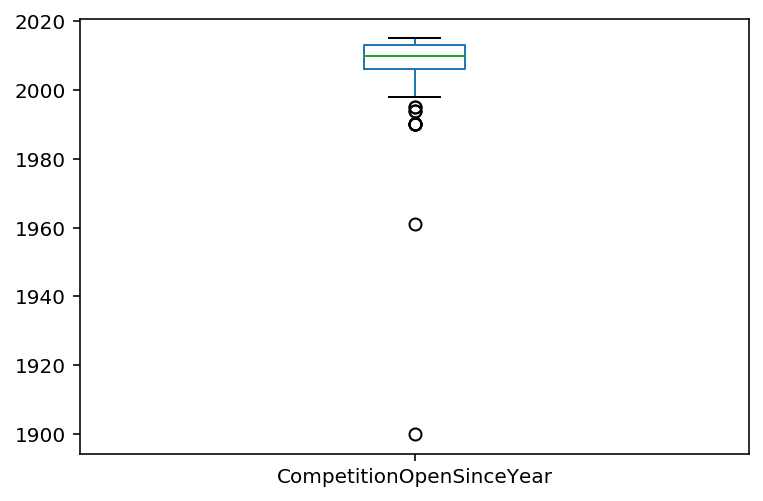

In [109]:
store['CompetitionOpenSinceYear'].plot.box()

In [110]:
store[~store['CompetitionOpenSinceYear'].isnull()].sort_values(by='CompetitionOpenSinceYear',ascending=True).head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
814,815,a,a,590.0,1.0,1900.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
145,146,d,c,8050.0,10.0,1961.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
991,992,a,a,2480.0,7.0,1990.0,0,NaN,NaN,NaN
706,707,a,c,2900.0,7.0,1990.0,0,NaN,NaN,NaN
328,329,a,a,1310.0,6.0,1990.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


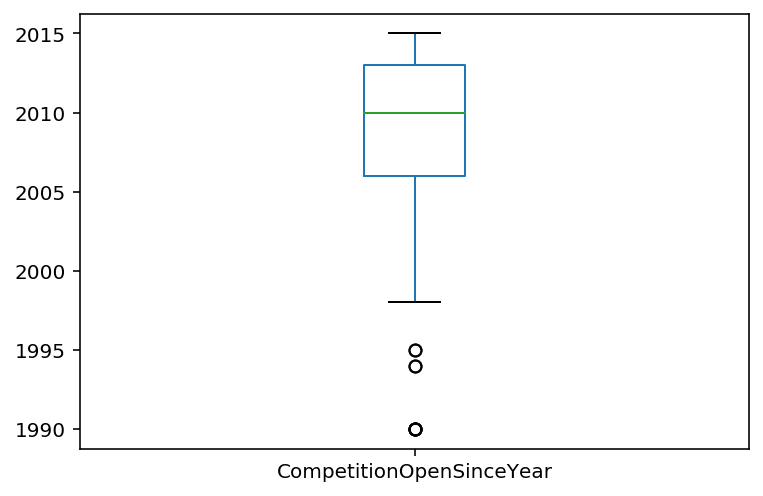

In [111]:
nan_index = store[~store['CompetitionOpenSinceYear'].isnull()].sort_values(by='CompetitionOpenSinceYear',ascending=True).head().index[:2]
store.loc[nan_index, ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']] = np.nan
store['CompetitionOpenSinceYear'].plot.box()

#### 数据转换

将对手开业年月转换为绝对时间（月）

In [112]:
store[~store['CompetitionOpenSinceMonth'].isnull()].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [113]:
store['CompetitionOpenTime'] = pd.Series(np.nan)

In [114]:
store.loc[:,'CompetitionOpenTime'] = (2015 - store['CompetitionOpenSinceYear'])*12 + 13 - store['CompetitionOpenSinceMonth'] 
del store['CompetitionOpenSinceMonth']
del store['CompetitionOpenSinceYear']

In [115]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenTime
0,1,c,a,1270.0,0,NaN,NaN,NaN,88.0
1,2,a,a,570.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",98.0
2,3,a,a,14130.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",109.0
3,4,c,c,620.0,0,NaN,NaN,NaN,76.0
4,5,a,a,29910.0,0,NaN,NaN,NaN,9.0


#### 缺失值处理

对竞争者的距离和开业时间的缺失值，分三种情况处理：

1. CompetitionDistance 缺失，CompetitionOpenTime 不缺失：使用 CompetitionDistance 均值填充
2. CompetitionDistance 不缺失，CompetitionOpenTime 缺失：使用 CompetitionOpenTime 均值填充
3. CompetitionDistance 缺失，CompetitionOpenTime 缺失：使用 CompetitionDistance 最大值填充 CompetitionDistance，使用 最大值 填充 CompetitionOpenTime

In [116]:
Distance_Null = store['CompetitionDistance'].isnull()
OpenTime_Null = store['CompetitionOpenTime'].isnull()

store.loc[Distance_Null & ~OpenTime_Null, 'CompetitionDistance'] = store['CompetitionDistance'].mean()
store.loc[~Distance_Null & OpenTime_Null, 'CompetitionOpenTime'] = store['CompetitionOpenTime'].mean()
store.loc[Distance_Null & OpenTime_Null, 'CompetitionDistance'] = max(store['CompetitionDistance'])
store.loc[Distance_Null & OpenTime_Null, 'CompetitionOpenTime'] = max(store['CompetitionOpenTime'])

print(sum(store['CompetitionDistance'].isnull()))
print(sum(store['CompetitionOpenTime'].isnull()))

0
0


对促销策略 Promo2 当无促销策略时，将其 Promo2SinceYear 和Promo2SinceWeek
赋值为 0:

In [117]:
store.loc[store['Promo2SinceYear'].isnull(), 'Promo2SinceYear'] = np.array(0)
store.loc[store['Promo2SinceWeek'].isnull(), 'Promo2SinceWeek'] = np.array(0)

In [118]:
store.to_csv('/Users/apple/Documents/Jupyter/Udacity/Rossmann_Store_Sales/data/store.csv')

## 数据探索

### 数据联合

联合训练集 train 与 附加信息数据集 store，并将 Date 数据转换为年月季度：

In [39]:
Date_to_Date = lambda x: x.day
Date_to_Month = lambda x: x.month
Date_to_Year = lambda x: x.year
Month_to_Season = dict(zip(np.arange(12)+1, np.repeat(np.arange(4)+1,3)))

train_extend = pd.merge(train,store,how='left')
train_extend['Date2'] = pd.to_datetime(train_extend['Date']) 
train_extend['Day'] = train_extend['Date2'].apply(Date_to_Date)
train_extend['Month'] = train_extend['Date2'].apply(Date_to_Month)
train_extend['Year'] = train_extend['Date2'].apply(Date_to_Year)
train_extend['Season'] = train_extend['Month'].map(Month_to_Season)
train_extend.drop(['Date','Date2'], axis=1, inplace=True)
train_extend = train_extend[['Store', 'Sales', 'Customers', 'Month', 'Day', 'Year', 'DayOfWeek',
 'Season', 'Open','StateHoliday', 'SchoolHoliday','CompetitionDistance',
 'CompetitionOpenTime','StoreType', 'Assortment', 'Promo',
 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear','PromoInterval']]
train_extend.head()

,Store,Sales,Customers,Month,Day,Year,DayOfWeek,Season,Open,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenTime,StoreType,Assortment,Promo,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5263,555,7,31,2015,5,3,1,0,1,1270.0,88.0,c,a,1,0,NaN,NaN,NaN
1,2,6064,625,7,31,2015,5,3,1,0,1,570.0,98.0,a,a,1,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,8314,821,7,31,2015,5,3,1,0,1,14130.0,109.0,a,a,1,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,13995,1498,7,31,2015,5,3,1,0,1,620.0,76.0,c,c,1,0,NaN,NaN,NaN
4,5,4822,559,7,31,2015,5,3,1,0,1,29910.0,9.0,a,a,1,0,NaN,NaN,NaN


### 数据可视化

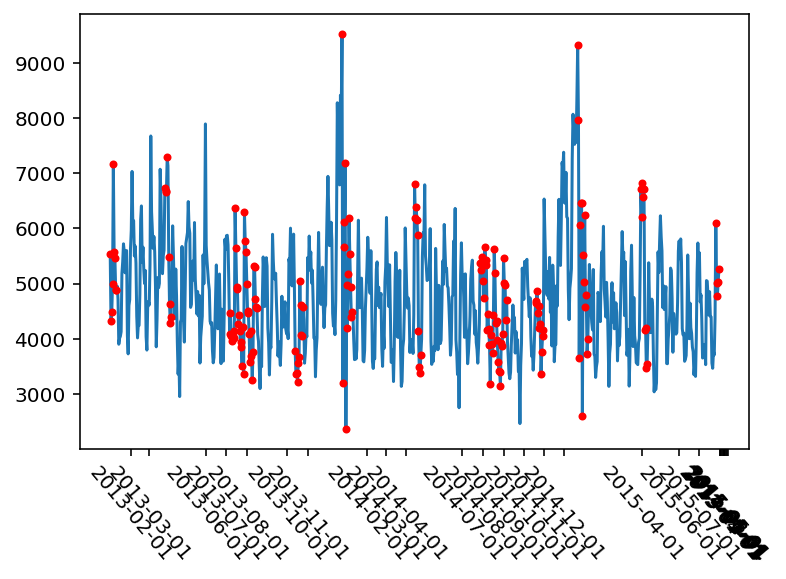

In [40]:
store_index = 1
y = train[(train['Store']==store_index) & (train['Open']==1)]['Sales'][::-1]
X = train[(train['Store']==store_index) & (train['Open']==1)]['Date'][::-1]
plt.plot(X,y)

y2 = train[(train['Store']==store_index) & (train['Open']==1) & (train['SchoolHoliday']==1)]['Sales'][::-1]
X2 = train[(train['Store']==store_index) & (train['Open']==1) & (train['SchoolHoliday']==1)]['Date'][::-1]
plt.plot(X2,y2,'r.')

plt.xticks(list(pd.date_range(X.iloc[1], X.iloc[-1], freq='MS').strftime('%Y-%m-%d')),rotation=-50)
plt.show()

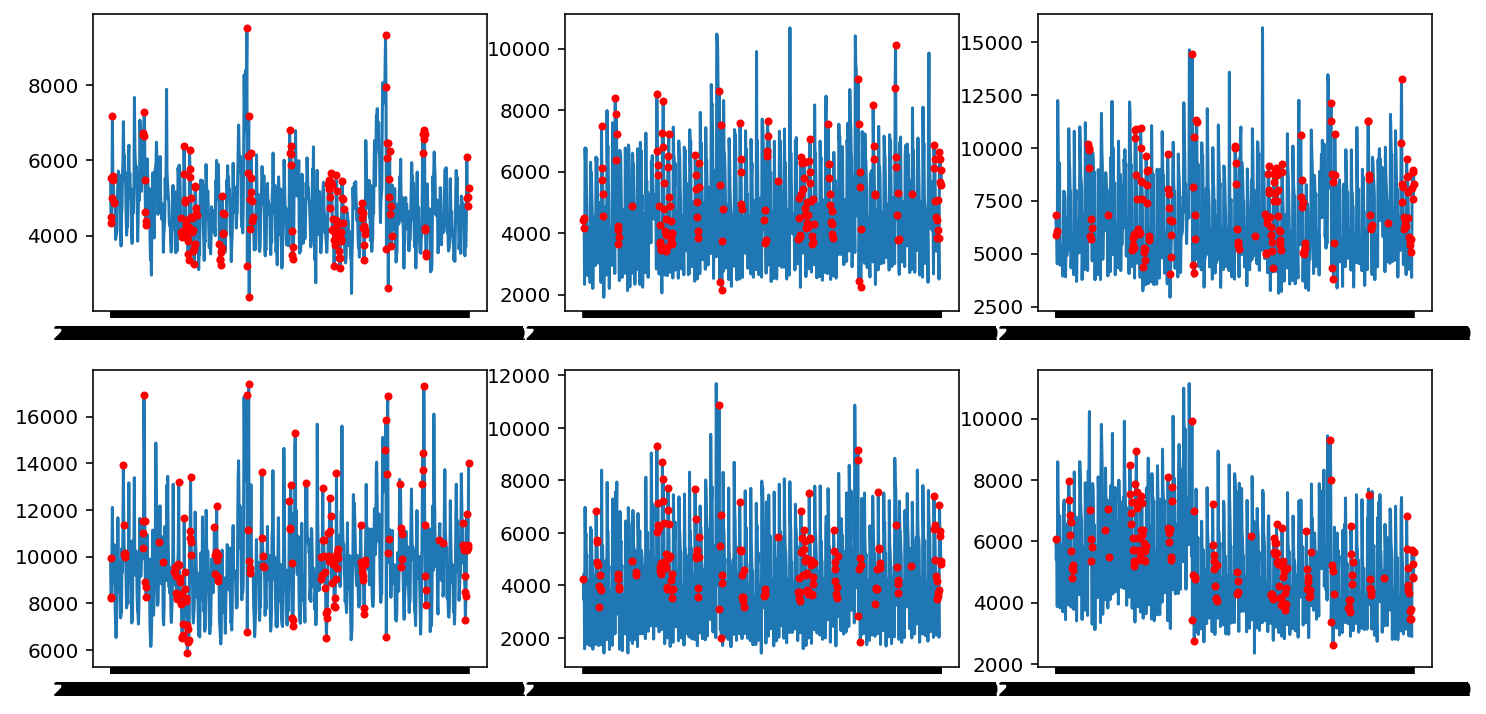

In [41]:
fig_num = 6
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes_x = [0,0,0,1,1,1]
axes_y = [0,1,2,0,1,2]
for figure in np.arange(0,fig_num):
    store_index = figure+1
    y = train[(train['Store']==store_index) & (train['Open']==1)]['Sales'][::-1]
    X = train[(train['Store']==store_index) & (train['Open']==1)]['Date'][::-1]
    axes[axes_x[figure], axes_y[figure]].plot(X,y)
#     axes[axes_x[figure], axes_y[figure]].set_xticklabels(
#         list(pd.date_range(X.iloc[1], X.iloc[-1], freq='MS').strftime('%Y-%m-%d')),rotation=-50,fontsize='small')

    y2 = train[(train['Store']==store_index) & (train['Open']==1) & (train['SchoolHoliday']==1)]['Sales'][::-1]
    X2 = train[(train['Store']==store_index) & (train['Open']==1) & (train['SchoolHoliday']==1)]['Date'][::-1]
    axes[axes_x[figure], axes_y[figure]].plot(X2,y2,'r.')
plt.show()

可以看到，当学校放假时商店的销量大概率会出现极值。

### 方差分析

In [42]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

for key in ['Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','Promo2']:
    print(train_extend.groupby([key])['Sales'].mean(),'\n')
    ols_data = train_extend[['Sales',key]]
    model = ols('Sales ~'+str(key),ols_data).fit()
    anovat = anova_lm(model)
    print(anovat,'\n')
    print('-----------------------------------------------------------------------------')

Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64 

                 df        sum_sq       mean_sq              F  PR(>F)
Promo           1.0  3.084989e+12  3.084989e+12  261680.524253     0.0
Residual  1017207.0  1.199200e+13  1.178914e+07            NaN     NaN 

-----------------------------------------------------------------------------
StateHoliday
0    5947.483893
a     290.735686
b     214.311510
c     168.733171
Name: Sales, dtype: float64 

                     df        sum_sq       mean_sq             F  PR(>F)
StateHoliday        3.0  9.744278e+11  3.248093e+11  23428.201635     0.0
Residual      1017205.0  1.410256e+13  1.386403e+07           NaN     NaN 

-----------------------------------------------------------------------------
SchoolHoliday
0    5620.979034
1    6476.522207
Name: Sales, dtype: float64 

                      df        sum_sq       mean_sq            F  PR(>F)
SchoolHoliday        1.0  1.092494e+11  1.092494e+11  7424.584761     0.

可以看出 ['Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','Promo2'] 这些变量对 Sales 均有明显影响。

### 箱线图

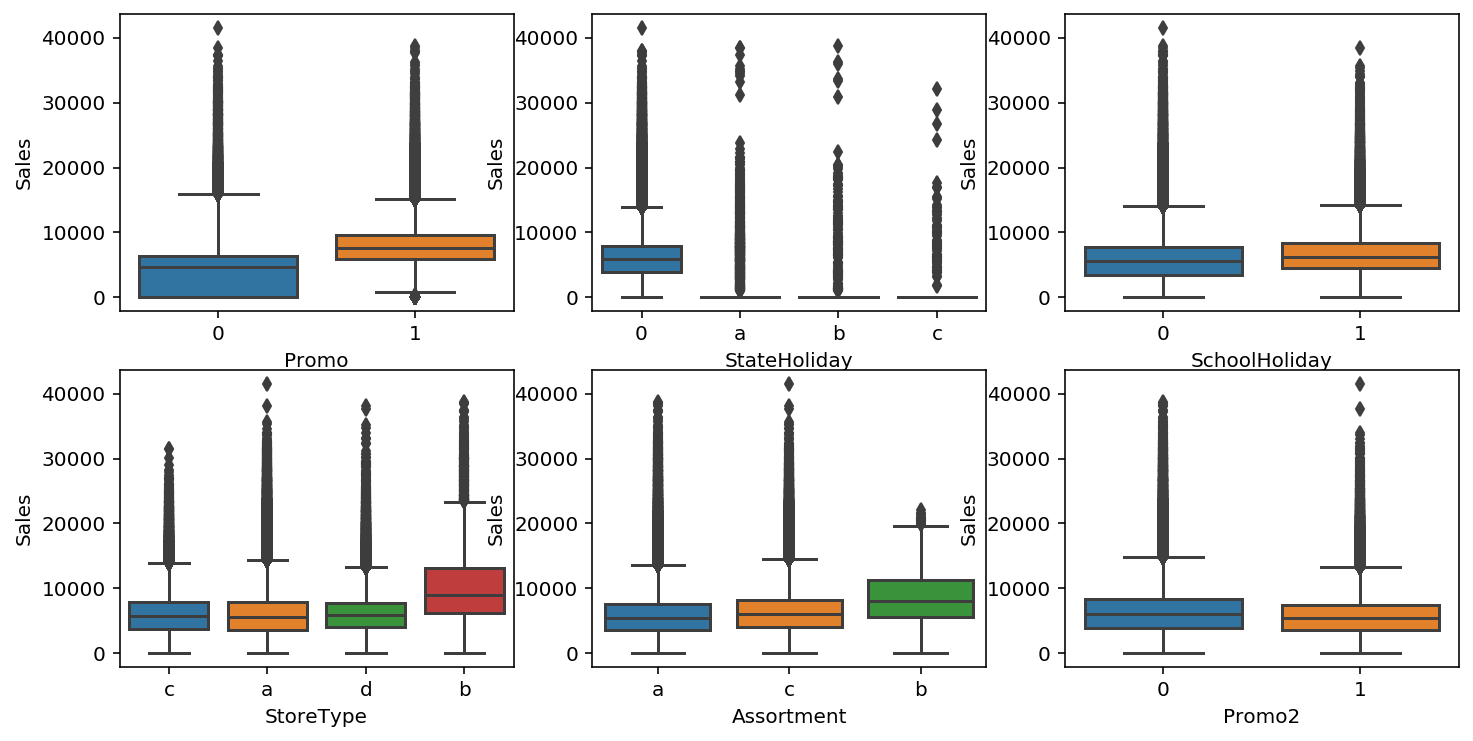

In [43]:
fig_num = 6
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes_x = [0,0,0,1,1,1]
axes_y = [0,1,2,0,1,2]
for i,key in enumerate(['Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','Promo2']):
    sns.boxplot(x=key, y='Sales', data=train_extend, ax=axes[axes_x[i],axes_y[i]])
plt.show()

1. 可以看出当商店正处于促销期（Promo=1）时销量高于平时时期；
2. 当不处于法定假期（StateHoliday=0）时销量高于其他时期；
3. 学习是否放假对销量没有明显影响；
4. b 类商店的销量高于其他商店；
5. 销售 b 类商品组合的商店销量稍高于其他商店；
6. 是否有周期性的促销策略对销量没有明显提高

### 相关性分析

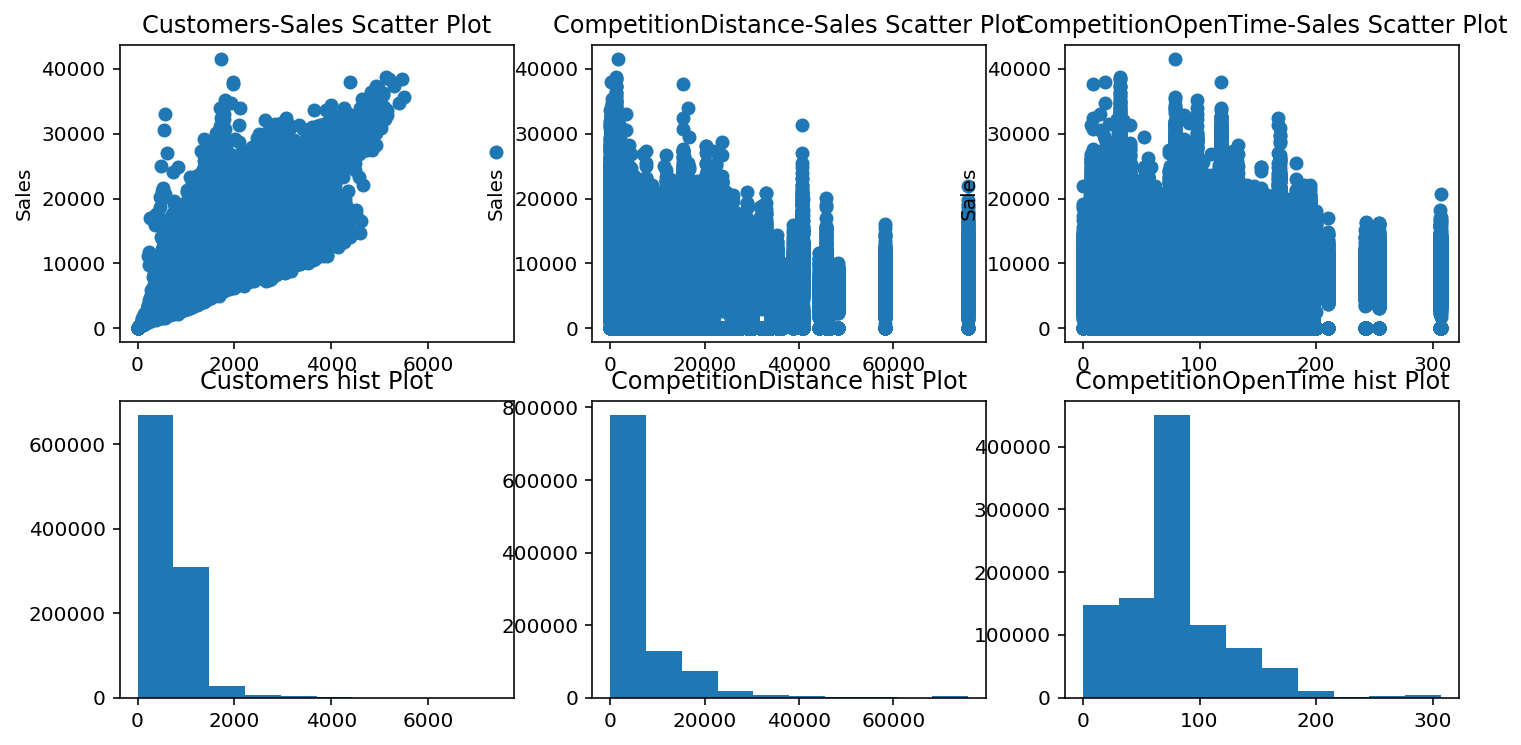

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(12,6))
for i,key in enumerate(['Customers','CompetitionDistance','CompetitionOpenTime','Customers','CompetitionDistance','CompetitionOpenTime']):
    if i <= 2:
        axes[0,i].scatter(train_extend[key],train_extend['Sales'])
        axes[0,i].set_title(key+'-Sales Scatter Plot') 
        axes[0,i].set_ylabel('Sales') 
    else:
        axes[1,i-3].hist(train_extend[key])
        axes[1,i-3].set_title(key+' hist Plot') 
plt.show()

In [45]:
train_extend[['Sales','Customers','CompetitionDistance','CompetitionOpenTime']].corr()

,Sales,Customers,CompetitionDistance,CompetitionOpenTime
Sales,1.000000,0.894711,-0.024339,-0.019748
Customers,0.894711,1.000000,-0.101331,-0.006827
CompetitionDistance,-0.024339,-0.101331,1.000000,-0.052897
CompetitionOpenTime,-0.019748,-0.006827,-0.052897,1.000000


可以看到，
1. Customers 对 Sales 有明显的正相关关系，而竞争者距离和竞争者开业市场则存在弱的负相关关系；
2. ['Customers','CompetitionDistance','CompetitionOpenTime' ] 呈现右偏。

### 可视化不同时段的销量

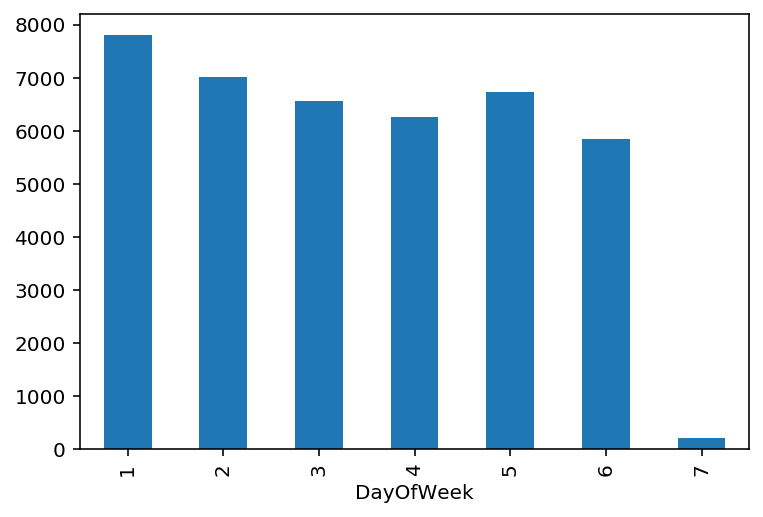

In [46]:
train_extend.groupby(by='DayOfWeek')['Sales'].mean().plot.bar()

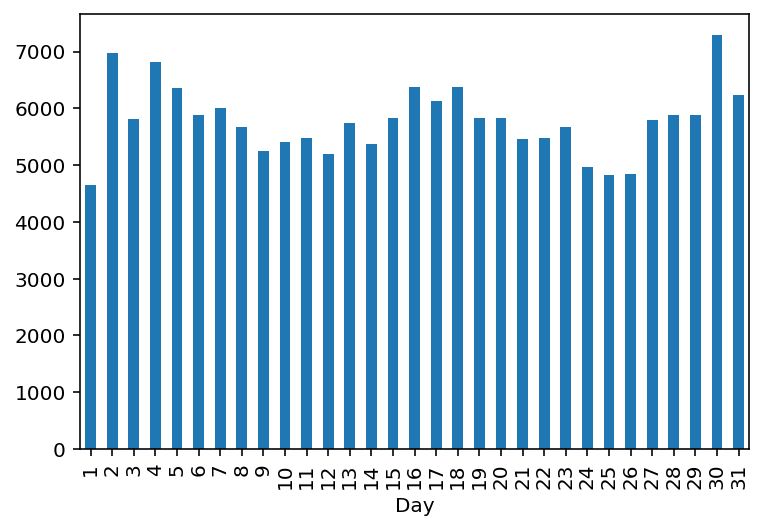

In [47]:
train_extend.groupby(by='Day')['Sales'].mean().plot.bar()

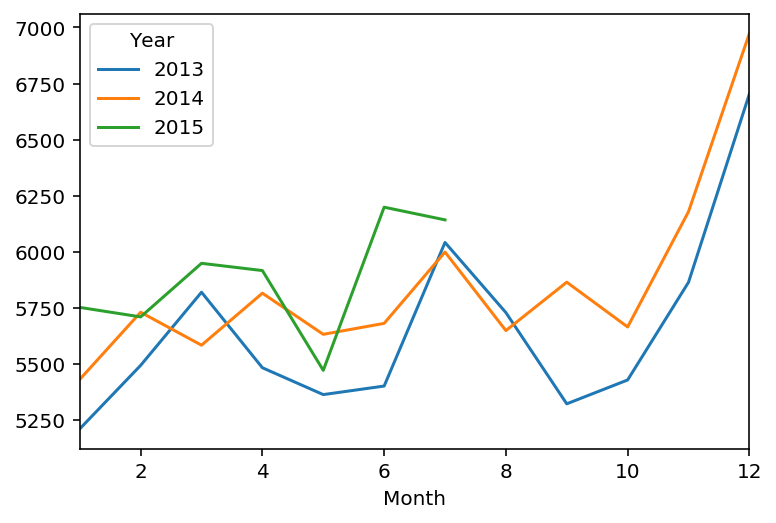

In [48]:
train_extend.groupby(by=['Month','Year'])['Sales'].mean().unstack().plot()

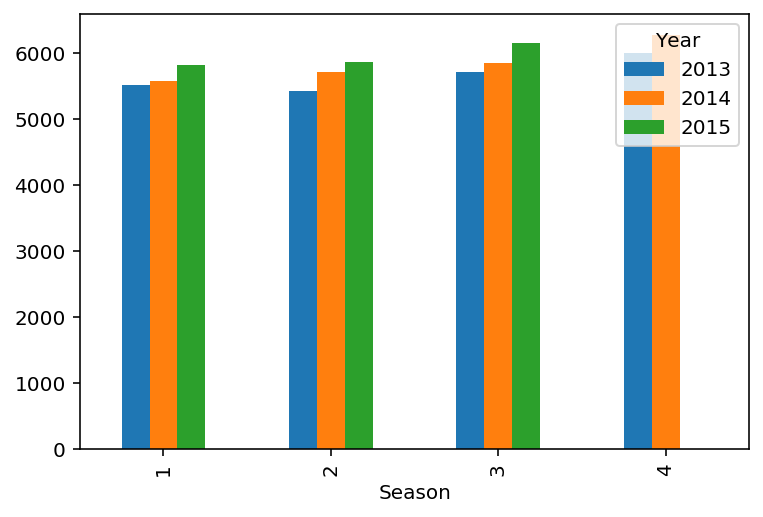

In [49]:
train_extend.groupby(by=['Season','Year'])['Sales'].mean().unstack().plot.bar()